from Func import *


# Start the timer
start_time = ti.time()

# For test IDS
# ---------------
# ID = [10875245]
# author = 'Kepler'
# Pl = ["K107"]
# Q = [2]
# PerExoRGB = [13.6]
# PerRef = [20.3]
# Per_uperrExoRGP = [2.6]
# Per_DnerrExoRGP = [1.5]
# Per_uperrRef = [3.3]
# Per_DnerrRef = [0.01]

# For All IDS
# -------------
ID = [10875245,12302530,10619192,9478990,9818381,5794240,8435766,757450,5383248]
Pl = ["K107","K155", "K17", "K39", "K43", "K45", "K78", "K75","K96"]
Q = [2,5,1,3,1,1,1,2,4]
PerExoRGB = [13.6,27.5,12,4.5,13.3,15.4,12.7,19.5,15.9]
PerRef = [20.3,26.43,12.01,4.5,12.95,15.8,12.588,19.18,15.3]

author = 'Kepler'
Per_uperrExoRGP = [2.6,1.2,0.1,0.1,1,0.6,0.2,0.2,0.4]
Per_DnerrExoRGP = [1.5,1,0.2,0.1,0.7,0.6,0.2,0.2,0.4]
Per_uperrRef = [3.3,1.32,0.16,0.07,0.25,0.2,0.03,0.25,0.01]
Per_DnerrRef = [0.01,1.32,0.16,0.07,0.25,0.2,0.03,0.25,0.01]
# ------------------------------------------------------------
# read from files
# KID, KOI, Pphot, Pspec, errPspec_Up, errPspec_Dn, 
# vsini, vsinierr, Rstar, errRstar_Up,errRstar_Dn, inclination

# fname = './ref_per.csv'
# df = pd.read_csv(fname)
# ID = df['KID']
# Pl = df['KID']
# Q = 2
# PerExoRGB = df['Pphot']
# PerRef = df['Pspec']
# author = 'Kepler'
# Per_uperrExoRGP = df['errPspec_Up']
# Per_DnerrExoRGP = df['errPspec_Dn']
# Per_uperrRef = df['errPspec_Up']
# Per_DnerrRef = df['errPspec_Dn']


# If you have ID
target_ids = ['KIC ' + str(id) for id in ID]  # Ensure target_ids is a list of strings

# target_ids = ID
for ii, target_id in enumerate(target_ids):
    print("start ------------------- ID:",target_id)
#     save_filepath = f'./{ID[ii]}.png'

    time_lc, flux_lc, time_s, flux_s, time_f, flux_f=plot_light_curves(target_id, author, Q[ii], window_length=51)
    # time_lc, flux_lc, time_s, flux_s, time_f, flux_f=plot_light_curves(target_id, author, Q, window_length=51)

    time, flux = time_s, flux_s

# For getting directly from file of online
#     filename1 = f'./out_data/{ID[ii]}.csv'
#     if os.path.exists(filename1):
#         df1 = pd.read_csv(filename1)
#         time = df1['Time']
#         flux = df1['Flux']
#     else:
#         time, flux = readID(target_id, quarter=Q[ii], filename=str(ID[ii]))

    valid_indices = np.isfinite(flux)
    time = time[valid_indices]
    flux = flux[valid_indices]
    lc = lk.LightCurve(time=time, flux=flux)
#     lc = lk.search_lightcurve(target_id).download().PDCSAP_FLUX
#     rmse_GP, rmse_RF, rmse_KN,rmse_XGB, rmse_Mu = model(time, flux)

    rmse_GP, rmse_RF, rmse_KN, rmse_XGB, rmse_DT, rmse_GB, rmse_weighted, rmse_ensemble,knn_score,RF_score,GB_score, DT_score,XGB_score,voting_pred_score,weighted_voting_pred_score,Voting_CM,Voting_FPR= model(time, flux)
#     ,voting_TPR,voting_TNR,voting_PPV,voting_NPV,voting_FPR,voting_FNR,voting_FDR 
    # RF_TPR,RF_TNR,RF_PPV,RF_NPV,RF_FPR,
    # RF_FNR,RF_FDR,KN_TPR,KN_TNR,KN_PPV,KN_NPV,KN_FPR,KN_FNR,KN_FDR,DT_TPR,DT_TNR,DT_PPV,DT_NPV,DT_FPR,DT_FNR,DT_FDR 

    time_RF, flux_RF = flux_prediction(time, flux, model='RandomForest')
    bls_period, bls_t0, bls_depth = BLS(lc.flatten(), time_RF, flux_RF)
#     P_RF = ls_periodogram(time_RF, flux_RF, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period)
    P_RF,err_RF = ls_periodogram(time_RF, flux_RF, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='RF')


    time_GP, flux_GP = flux_prediction(time, flux, model='Gaussian')
    bls_period, bls_t0, bls_depth = BLS(lc.flatten(), time_GP, flux_GP)
#     P_GP = ls_periodogram(time_GP, flux_GP, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period)
    P_GP,err_GP = ls_periodogram(time_GP, flux_GP, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='GP')

    time_KN, flux_KN = flux_prediction(time, flux, model='KNeighbors')
    bls_period, bls_t0, bls_depth = BLS(lc.flatten(), time_KN, flux_KN)
#     P_KN = ls_periodogram(time_KN, flux_KN, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period)
    P_KN,err_KN = ls_periodogram(time_KN, flux_KN, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='KN')

    time_XGB, flux_XGB = flux_prediction(time, flux, model='XGBRegressor')
    bls_period, bls_t0, bls_depth = BLS(lc.flatten(), time_XGB, flux_XGB)
#     P_XGB = ls_periodogram(time_XGB, flux_XGB, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period)
    P_XGB,err_XGB = ls_periodogram(time_XGB, flux_XGB, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='XGB')


    time_DT, flux_DT = flux_prediction(time, flux, model='DecisionTree')
    bls_period, bls_t0, bls_depth = BLS(lc.flatten(), time_DT, flux_DT)
#     P_DT = ls_periodogram(time_DT, flux_DT, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period)
    P_DT,err_DT = ls_periodogram(time_DT, flux_DT, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='DT')
    

    time_GB, flux_GB = flux_prediction(time, flux, model='GradientBoosting')
    bls_period, bls_t0, bls_depth = BLS(lc.flatten(), time_GB, flux_GB)
#     P_GB = ls_periodogram(time_GB, flux_GB, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period)
    P_GB,err_GB = ls_periodogram(time_GB, flux_GB, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='GB')
    

    time_Mu, flux_Mu = flux_prediction(time, flux, model='MultiVote')
    bls_period_Mu, bls_t0, bls_depth = BLS(lc.flatten(), time_Mu, flux_Mu)
#     P_Mu = ls_periodogram(time_Mu, flux_Mu, xlim_min=1, xlim_max=time_Mu.max()-time_Mu.min(), bls=bls_period_Mu)
    P_Mu,err_Mu = ls_periodogram(time_Mu, flux_Mu, xlim_min=1, xlim_max=time.max()-time.min(), bls=bls_period,target_id=target_id,Model='Mu')
    print('P_Ref:',PerRef[ii],'PerExoRGB',PerExoRGB[ii], 'P_Mu:',P_Mu, 'P_XGB:',P_XGB, 'P_RF:',P_RF,'P_GB:',P_GB, 'P_DT:',P_DT )

    # Save rmse values in a CSV file
    rmse_data = pd.DataFrame({
        'Pl':[Pl[ii]],
        'ID': [ID[ii]],
#         'Kp': [Kp[ii]],
#         'Rad': [Rad[ii]],
        'PerExoRGB': [PerExoRGB[ii]],
        'PerRef': [PerRef[ii]],
        'Per_uperrExoRGP': [Per_uperrExoRGP[ii]],
        'Per_DnerrExoRGP': [Per_DnerrExoRGP[ii]],
        'Per_uperrRef': [Per_uperrRef[ii]],
        'Per_DnerrRef': [Per_DnerrRef[ii]],
#         'R_star': [R_star[ii]],
        'rmse_DT': [rmse_DT],
        'rmse_RF': [rmse_RF],
        'rmse_KN': [rmse_KN],
        'rmse_GB': [rmse_GB],
        'rmse_XGB': [rmse_XGB],
        'rmse_Mu': [rmse_ensemble],
        'knn_score': [knn_score],
        'RF_score': [RF_score],
        'RF_score': [RF_score],
        'GB_score': [GB_score],
        'DT_score': [DT_score],
        'XGB_score': [XGB_score],
        'P_RF': [P_RF],
        'P_DT': [P_DT],
        'P_KN': [P_KN],
        'P_GB': [P_GB],
        'P_GB': [P_GB],
        'P_Mu': [P_Mu],
        'err_RF': [err_RF],
        'err_DT': [err_DT],
        'err_KN': [err_KN],
        'err_GB': [err_GB],
        'err_XGB':[err_GB],
        'err_Mu': [err_Mu],          
        'Voting_CM' : [Voting_CM],
        'voting_TPR': [Voting_FPR[0]],
        'voting_TNR': [Voting_FPR[1]],
        'voting_PPV': [Voting_FPR[2]],
        'voting_NPV': [Voting_FPR[3]],
        'voting_FPR': [Voting_FPR[4]],
        'voting_FNR': [Voting_FPR[5]],
        'voting_FDR': [Voting_FPR[6]],
        'voting_ACC': [Voting_FPR[7]]
    })


    # Get the current date and time
    current_datetime = datetime.datetime.now()
    # Format the date and time
    date_string = current_datetime.strftime("%Y-%m-%d")
    time_string = current_datetime.strftime("%H-%M-%S")

    # Construct the new filename
    rmse_filename = f'./out_data/RMSE_{date_string}_Vic.csv'

    # rmse_filename = f'./out_data/RMSE.csv'

    if os.path.exists(rmse_filename):
        rmse_data.to_csv(rmse_filename, mode='a', header=False, index=False)
    else:
        rmse_data.to_csv(rmse_filename, index=False)

#     Plot light Curve
#     plot_LC(target_id) # No need for all IDs
#     plot models and averages include RMSE and ID
    plot_models(time,flux,  time_Mu, flux_Mu,time_KN, flux_KN, time_GB, flux_GB, time_XGB, flux_XGB, time_DT, flux_DT, time_RF, flux_RF, rmse_GB, rmse_XGB, rmse_RF, rmse_KN, rmse_DT,rmse_ensemble,target_id)

# End the timer
end_time = ti.time()

# Calculate the duration
duration = end_time - start_time

# Print the duration
print("Run duration:", duration, "seconds")


/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_9308/851553061.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


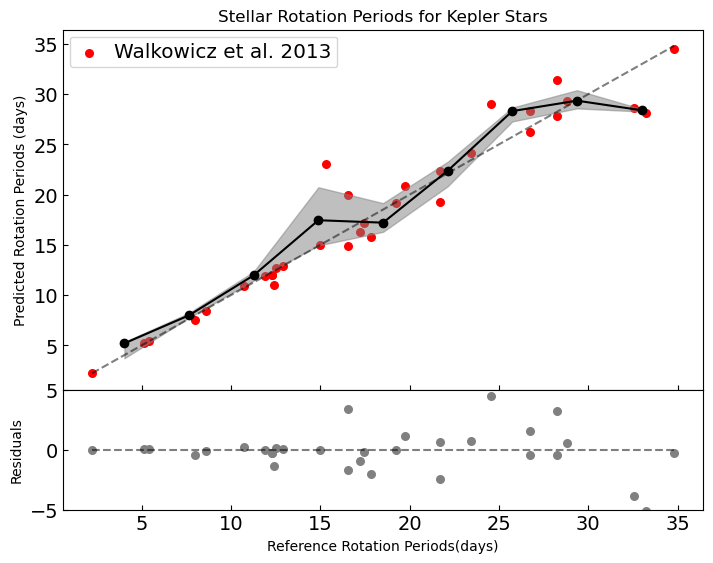

In [4]:
from Func import *

# If you have data
rmse_filename = f'./out_data/RMSE_matched_Q9_Q2_Q3_2023_05_19.csv'
df = pd.read_csv(rmse_filename)
save_filepath = './out_data/Rotation_Periods_GP_Walkowicz2013.pdf'
plot_period_comparison(df, save_filepath, model = 'MM')

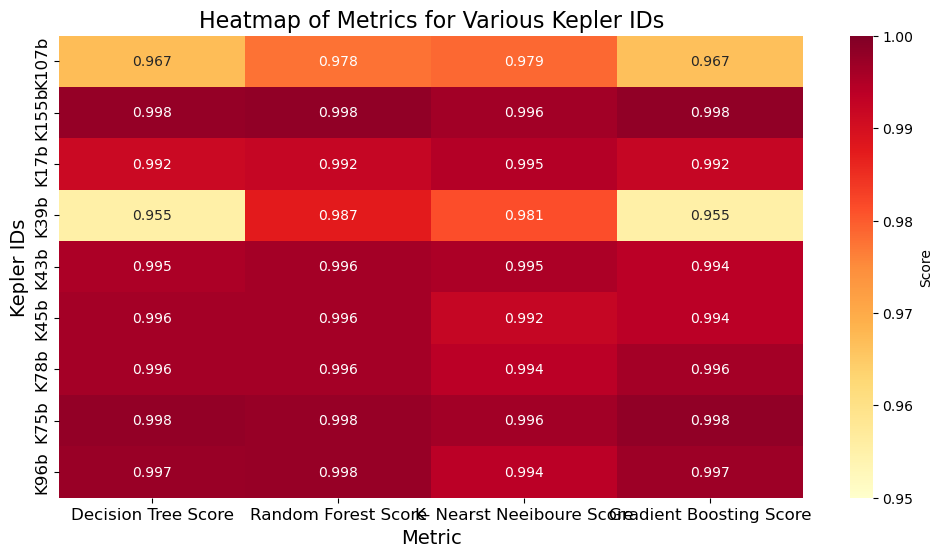

<Figure size 1200x600 with 0 Axes>

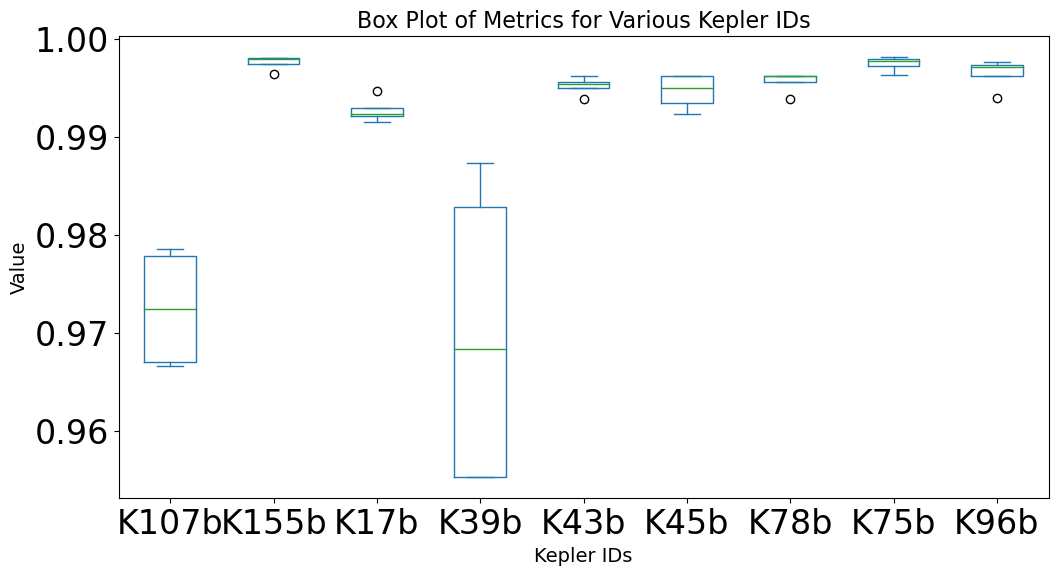

In [1]:
#### HEAT MAPS SCORE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = {
    'Metric': ['Decision Tree Score', 'Random Forest Score', 'K- Nearst Neeiboure Score', 'Gradient Boosting Score'],
    'K107b': [0.9671779141104293, 0.9776073619631902, 0.9785276073619631, 0.9665644171779141],
    'K155b': [0.997773524819755, 0.9980516889365841, 0.996381541989997, 0.9980516889365841],
    'K17b': [0.9915384615384616, 0.9923076923076923, 0.9946153846153847, 0.9923076923076923],
    'K39b': [0.9553184508755861, 0.9873198361380341, 0.9812798184577108, 0.9553175395187123],
   
    'K43b': [0.9953846153846154, 0.9961538461538462, 0.9953846153846154, 0.9938461538461538],
    'K45b': [0.9961538461538462, 0.9961538461538462, 0.9923076923076923, 0.9938461538461538],
   
    'K78b': [0.9961538461538462, 0.9961538461538462, 0.9938461538461538, 0.9961538461538462],
    'K75b': [0.9978527607361963, 0.9975460122699387, 0.9963190184049079, 0.9981595092024541],
    'K96b': [0.9972672050772331, 0.9975706952138037, 0.9939255849564829, 0.996963253709452]


}
df = pd.DataFrame(data)

# fname = './out_data/VIC_smaple/RMSE_2024-05-25_Vic.csv'
# df = pd.read_csv(fname)
# Heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df.set_index('Metric').T, annot=True, fmt='.3f', cmap='YlOrRd', vmin=0.95, vmax=1, cbar_kws={'label': 'Score'})

# Set x-axis and y-axis labels
ax.set_xlabel('Metric', fontsize=14)
ax.set_ylabel('Kepler IDs', fontsize=14)

# Increase font size of numbers
ax.tick_params(labelsize=12)

plt.title('Heatmap of Metrics for Various Kepler IDs', fontsize=16)

# Save the figure
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Box Plot
plt.figure(figsize=(12, 6))
ax = df.plot(kind='box', figsize=(12, 6))
plt.title('Box Plot of Metrics for Various Kepler IDs', fontsize=16)
plt.ylabel('Value', fontsize=14)

# Increase font size of x-axis and y-axis labels
ax.set_xlabel('Kepler IDs', fontsize=14)
ax.set_ylabel('Value', fontsize=14)

# Increase font size of numbers
ax.tick_params(axis='both', labelsize=24)

# Save the figure
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')


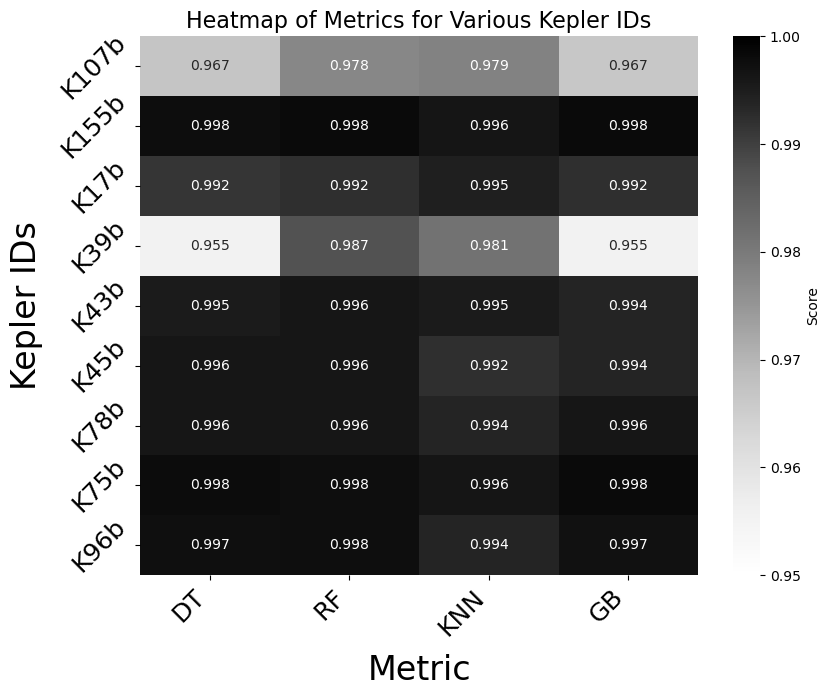

<Figure size 1200x600 with 0 Axes>

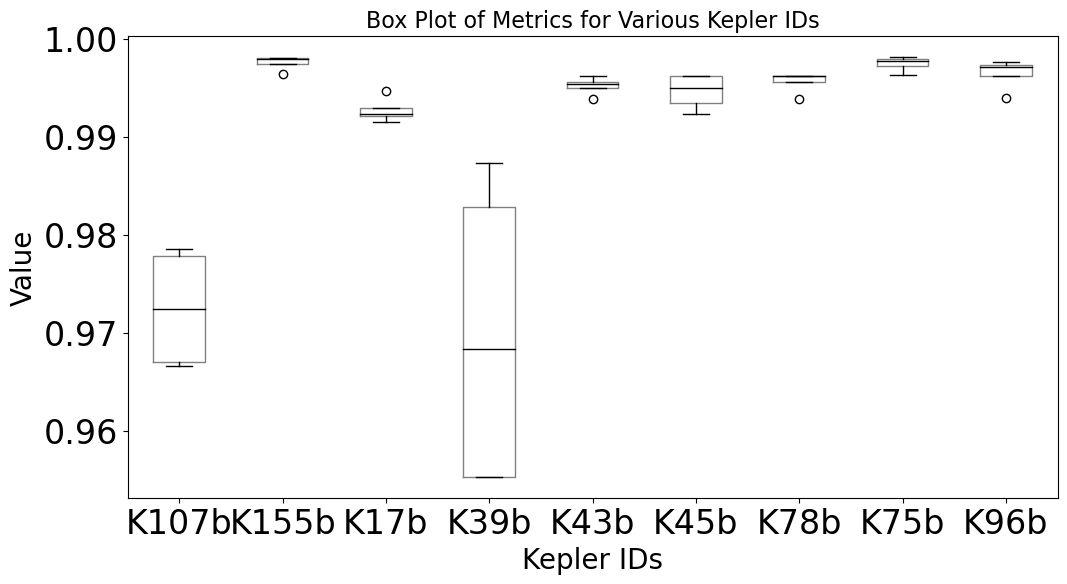

In [18]:
#### HEAT MAPS SCORE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = {
    'Metric': ['DT', 'RF', 'KNN', 'GB'],
    'K107b': [0.9671779141104293, 0.9776073619631902, 0.9785276073619631, 0.9665644171779141],
    'K155b': [0.997773524819755, 0.9980516889365841, 0.996381541989997, 0.9980516889365841],
    'K17b': [0.9915384615384616, 0.9923076923076923, 0.9946153846153847, 0.9923076923076923],
    'K39b': [0.9553184508755861, 0.9873198361380341, 0.9812798184577108, 0.9553175395187123],
    'K43b': [0.9953846153846154, 0.9961538461538462, 0.9953846153846154, 0.9938461538461538],
    'K45b': [0.9961538461538462, 0.9961538461538462, 0.9923076923076923, 0.9938461538461538],
    'K78b': [0.9961538461538462, 0.9961538461538462, 0.9938461538461538, 0.9961538461538462],
    'K75b': [0.9978527607361963, 0.9975460122699387, 0.9963190184049079, 0.9981595092024541],
    'K96b': [0.9972672050772331, 0.9975706952138037, 0.9939255849564829, 0.996963253709452]
}

df = pd.DataFrame(data)

# Heatmap
plt.figure(figsize=(9, 7))
ax = sns.heatmap(df.set_index('Metric').T, annot=True, fmt='.3f', cmap='Greys', vmin=0.95, vmax=1, cbar_kws={'label': 'Score'})

# Set x-axis and y-axis labels
ax.set_xlabel('Metric', fontsize=24, labelpad=10)
ax.set_ylabel('Kepler IDs', fontsize=24, labelpad=10)

# Increase font size of numbers
ax.tick_params(axis='both', labelsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Heatmap of Metrics for Various Kepler IDs', fontsize=16)

# Save the figure
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Box Plot
plt.figure(figsize=(12, 6))
ax = df.plot(kind='box', figsize=(12, 6), color=dict(boxes='gray', whiskers='black', medians='black', caps='black'))
plt.title('Box Plot of Metrics for Various Kepler IDs', fontsize=16)
plt.ylabel('Value', fontsize=14)

# Increase font size of x-axis and y-axis labels
ax.set_xlabel('Kepler IDs', fontsize=20)
ax.set_ylabel('Value', fontsize=20)

# Increase font size of numbers
ax.tick_params(axis='both', labelsize=24)

# Save the figure
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')


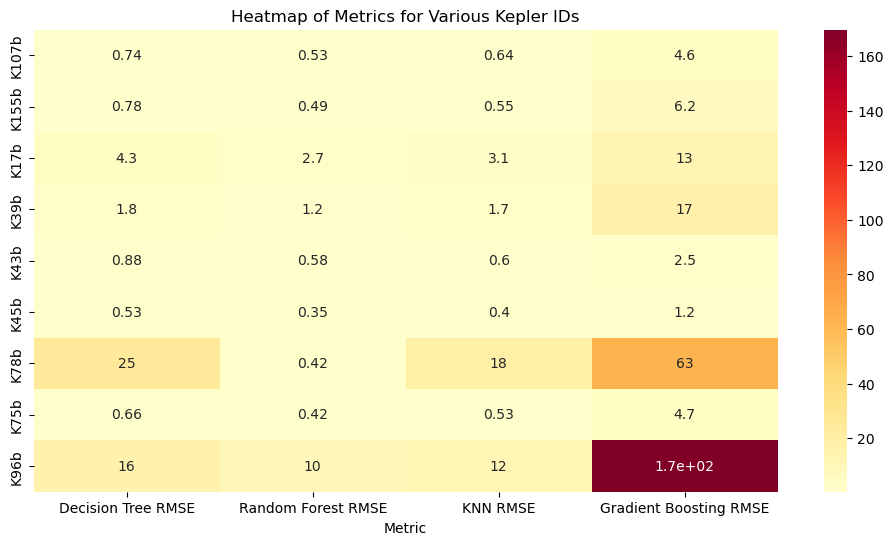

<Figure size 1200x600 with 0 Axes>

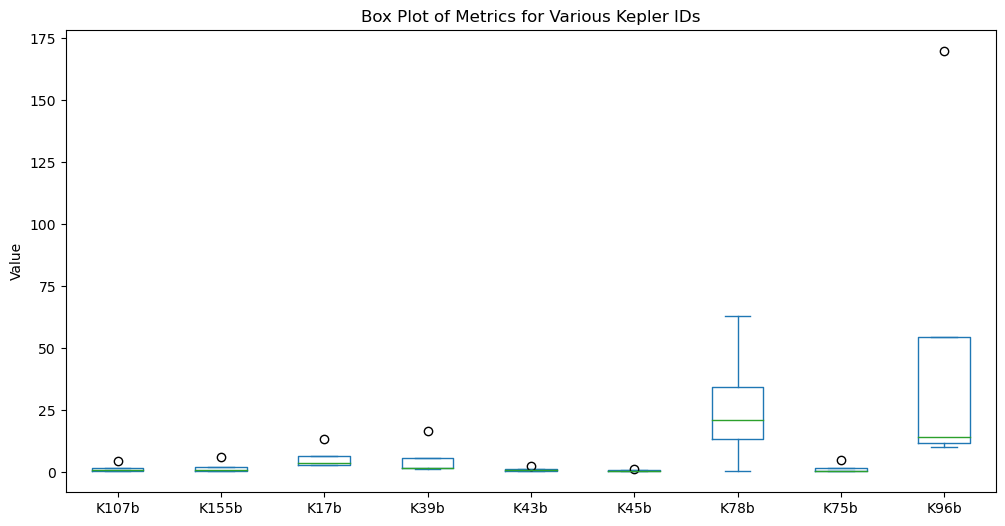

In [2]:
#### HEAT MAPS RMSE


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Combine the data into a single DataFrame
data = {
    'Metric': ['Decision Tree Score', 'Random Forest Score', 'K- Nearst Neeiboure Score', 'Gradient Boosting Score'],
    'K107b': [0.9671779141104293, 0.9776073619631902, 0.9785276073619631, 0.9665644171779141],
    'K155b': [0.997773524819755, 0.9980516889365841, 0.996381541989997, 0.9980516889365841],
    'K17b': [0.9915384615384616, 0.9923076923076923, 0.9946153846153847, 0.9923076923076923],
    'K39b': [0.9553184508755861, 0.9873198361380341, 0.9812798184577108, 0.9553175395187123],
   
    'K43b': [0.9953846153846154, 0.9961538461538462, 0.9953846153846154, 0.9938461538461538],
    'K45b': [0.9961538461538462, 0.9961538461538462, 0.9923076923076923, 0.9938461538461538],
   
    'K78b': [0.9961538461538462, 0.9961538461538462, 0.9938461538461538, 0.9961538461538462],
    'K75b': [0.9978527607361963, 0.9975460122699387, 0.9963190184049079, 0.9981595092024541],
    'K96b': [0.9972672050772331, 0.9975706952138037, 0.9939255849564829, 0.996963253709452]


}
df = pd.DataFrame(data)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.set_index('Metric').T, annot=True, cmap='YlOrRd')
plt.title('Heatmap of Metrics for Various Kepler IDs')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
df.plot(kind='box', figsize=(12, 6))
plt.title('Box Plot of Metrics for Various Kepler IDs')
plt.ylabel('Value')
plt.show()


/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_64749/2979618366.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_64749/2979618366.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_64749/2979618366.py:135: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_64749/2979618366.py:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykern

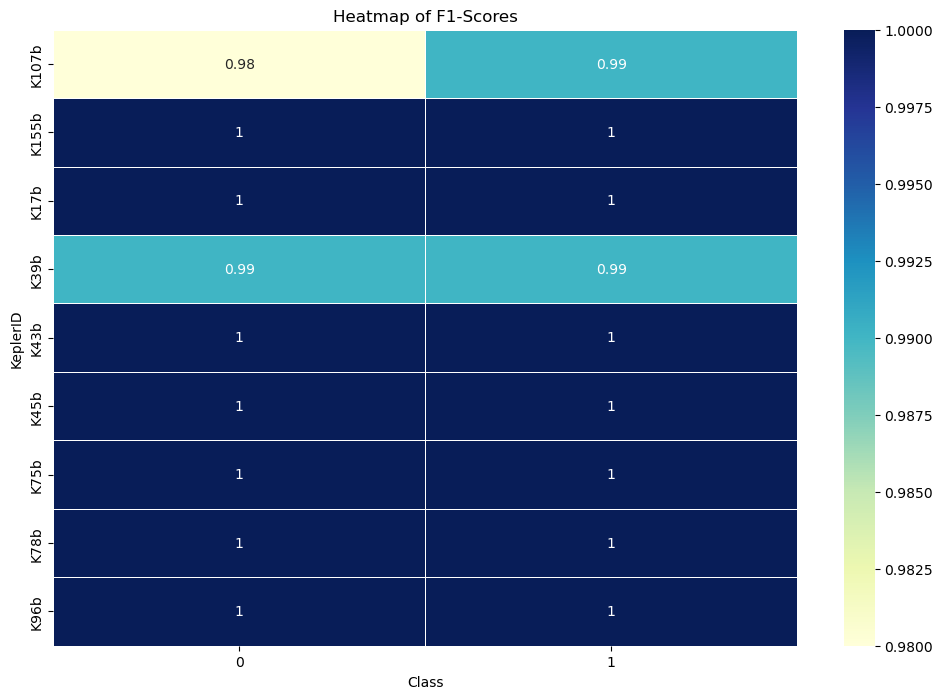

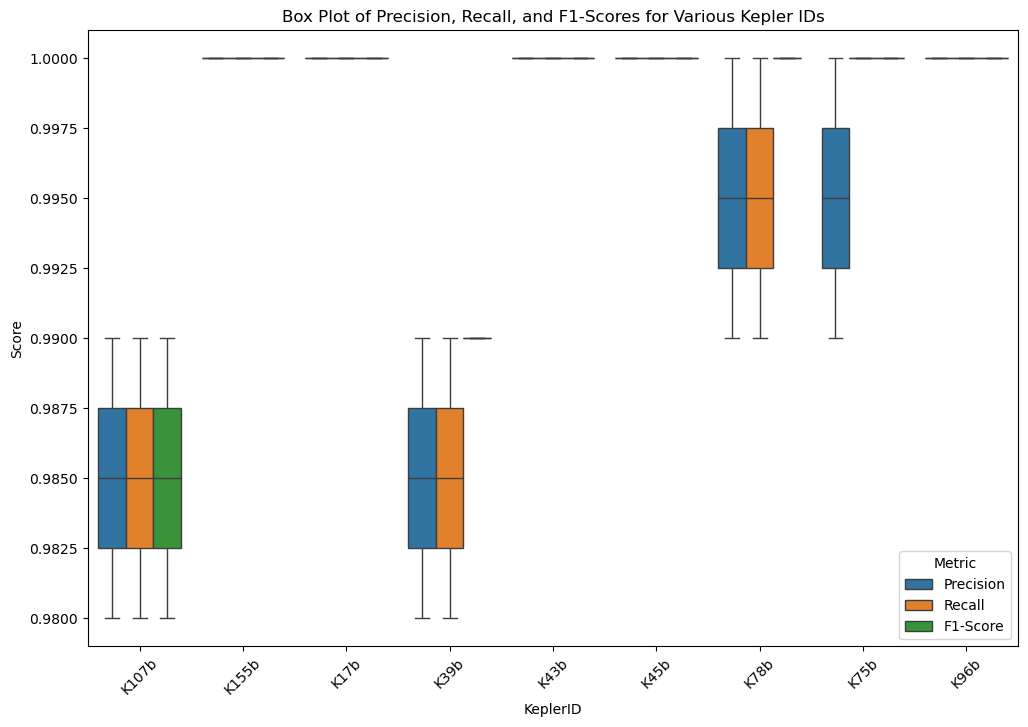

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for classification reports
data = {
    'K107b': '''Multi Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       399
           1       0.98      0.99      0.99       416

    accuracy                           0.99       815
   macro avg       0.99      0.99      0.99       815''',

    'K155b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       475

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899''',

    'K17b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       218

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326''',

    'K39b': '''Multi Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       403
           1       0.98      0.99      0.99       425

    accuracy                           0.99       828
   macro avg       0.99      0.99      0.99       828''',

    'K43b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       185

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326''',

    'K45b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       144

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326''',

    'K78b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       144

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326''',

    'K78b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       140
           1       0.99      1.00      1.00       186

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326''',

    'K75b': '''Multi Model:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       355
           1       1.00      1.00      1.00       460

    accuracy                           1.00       815
   macro avg       1.00      1.00      1.00       815''',

    'K96b': '''Multi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5038
           1       1.00      1.00      1.00      4194

    accuracy                           1.00      9232
   macro avg       1.00      1.00      1.00      9232'''
}

# Extract metrics into a DataFrame
def extract_metrics(report):
    lines = report.split('\n')
    metrics = []
    for line in lines[2:]:
        if line.strip() == '' or 'avg' in line:
            continue
        parts = line.split()
        if len(parts) < 4:
            continue
        label = parts[0]
        precision = float(parts[1])
        recall = float(parts[2])
        f1_score = float(parts[3])
        metrics.append([label, precision, recall, f1_score])
    return metrics

all_metrics = {}
for key, report in data.items():
    all_metrics[key] = extract_metrics(report)

# Convert to DataFrame for plotting
df = pd.DataFrame(columns=['KeplerID', 'Class', 'Metric', 'Score'])
for key, metrics in all_metrics.items():
    for metric in metrics:
        df = df.append({
            'KeplerID': key,
            'Class': metric[0],
            'Metric': 'Precision',
            'Score': metric[1]
        }, ignore_index=True)
        df = df.append({
            'KeplerID': key,
            'Class': metric[0],
            'Metric': 'Recall',
            'Score': metric[2]
        }, ignore_index=True)
        df = df.append({
            'KeplerID': key,
            'Class': metric[0],
            'Metric': 'F1-Score',
            'Score': metric[3]
        }, ignore_index=True)

# Heatmap of F1-Scores
heatmap_data = df[df['Metric'] == 'F1-Score'].pivot("KeplerID", "Class", "Score")
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of F1-Scores')
plt.show()

# Box Plot of all metrics
plt.figure(figsize=(12, 8))
sns.boxplot(x="KeplerID", y="Score", hue="Metric", data=df)
plt.title('Box Plot of Precision, Recall, and F1-Scores for Various Kepler IDs')
plt.xticks(rotation=45)
plt.show()


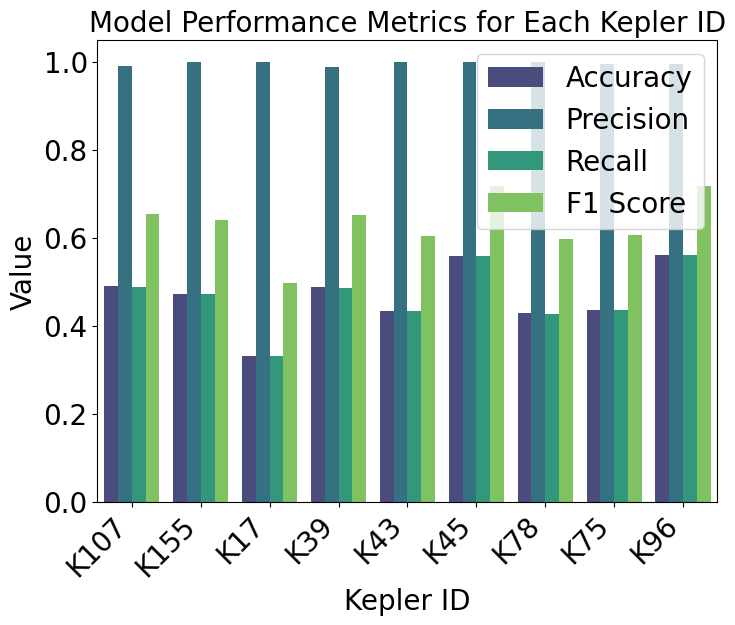

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from file
data = pd.DataFrame({
    'Pl ID': ['K107', 'K155', 'K17', 'K39', 'K43', 'K45', 'K78', 'K75', 'K96'],
    'TP': [391, 424, 108, 397, 141, 182, 138, 355, 460],
    'TN': [8, 0, 0, 6, 0, 0, 2, 0, 1],
    'FP': [4, 0, 0, 5, 0, 0, 0, 2, 3],
    'FN': [412, 475, 218, 420, 185, 144, 186, 458, 360]
})

# Calculate model performance based on confusion matrix
performance_data = []
for index, row in data.iterrows():
    kepler_id = row['Pl ID']
    tp, tn, fp, fn = row['TP'], row['TN'], row['FP'], row['FN']
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    performance_data.append([kepler_id, accuracy, precision, recall, f1_score])

performance_df = pd.DataFrame(performance_data, columns=['Kepler ID', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Kepler ID', y='Value', hue='Metric', data=performance_df.melt('Kepler ID', var_name='Metric', value_name='Value'), palette='viridis')
ax.set_title('Model Performance Metrics for Each Kepler ID', fontsize=20)
ax.set_ylabel('Value', fontsize=20)
ax.set_xlabel('Kepler ID', fontsize=20)
plt.xticks(rotation=45, ha='right')

ax.tick_params(labelsize=20)
ax.legend(fontsize=20)

# Save the figure
plt.savefig('bar_plot.png', dpi=300, bbox_inches='tight')

# Display the figure
plt.show()

Index(['Pl', 'ID', 'PerExoRGB', 'PerRef', 'Per_uperrExoRGP', 'Per_DnerrExoRGP',
       'Per_uperrRef', 'Per_DnerrRef', 'rmse_DT', 'rmse_RF', 'rmse_KN',
       'rmse_GB', 'rmse_XGB', 'rmse_Mu', 'P_RF', 'P_DT', 'P_KN', 'P_GB',
       'P_Mu', 'TP', 'TN', 'FP', 'FN', 'voting_TPR', 'voting_TNR',
       'voting_PPV', 'voting_NPV', 'voting_FPR', 'voting_FNR', 'voting_FDR',
       'voting_ACC', 'Kepler ID'],
      dtype='object')


/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_95974/2438040037.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


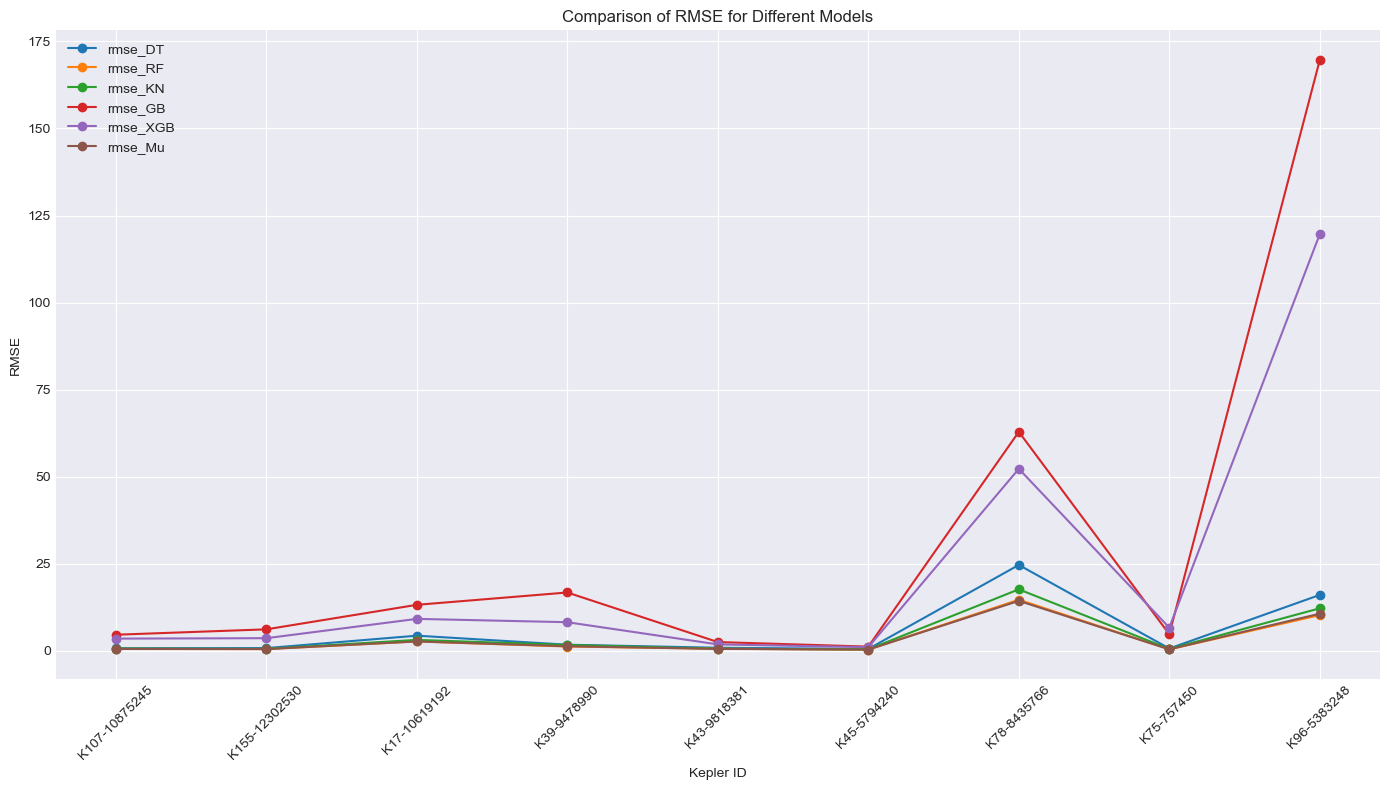

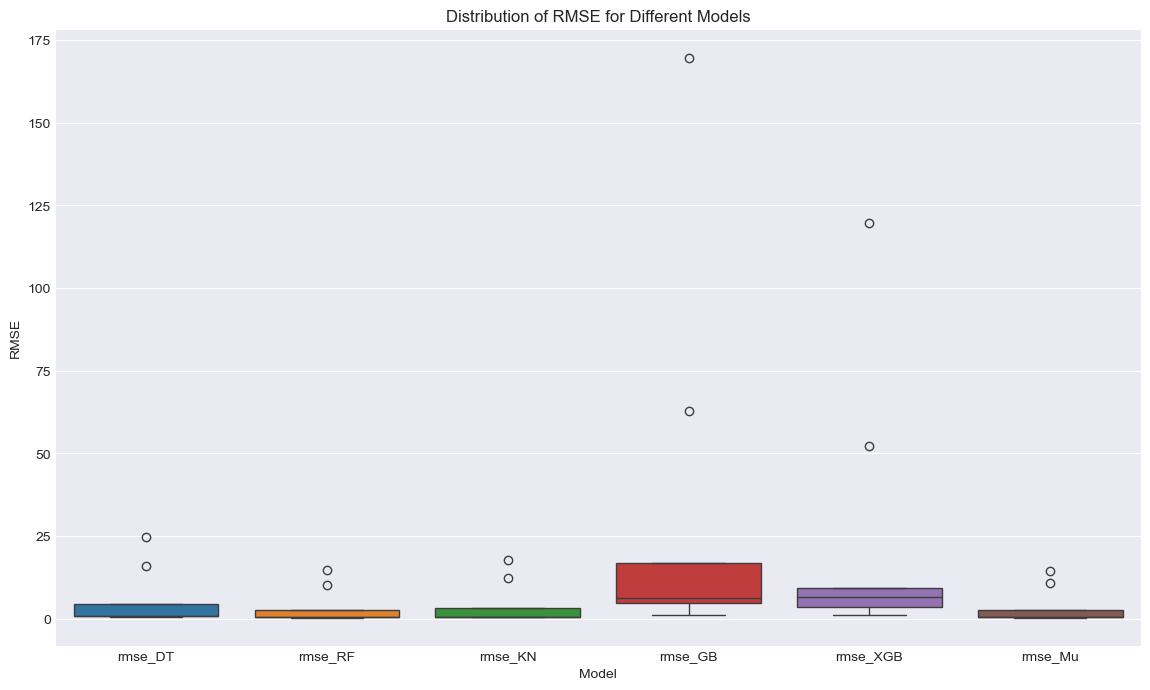

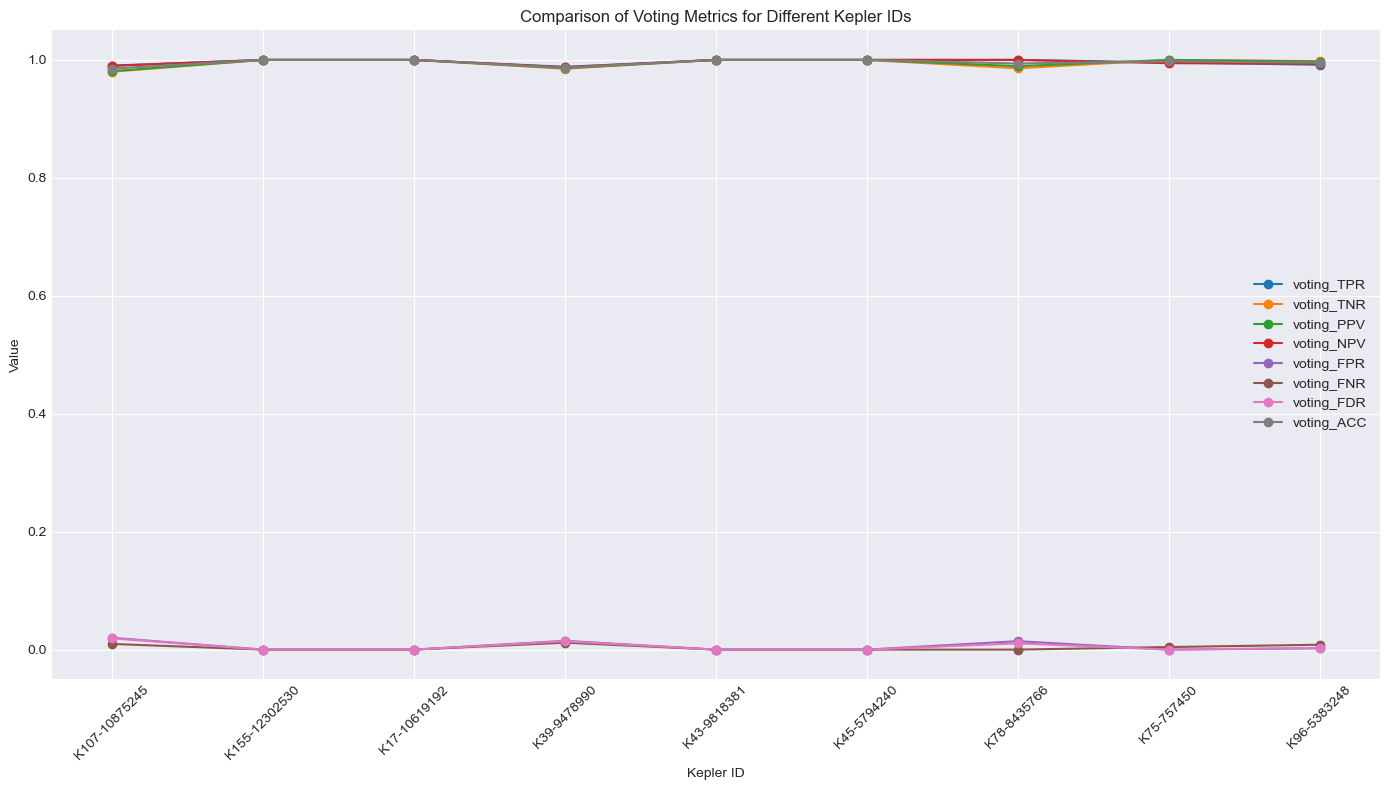

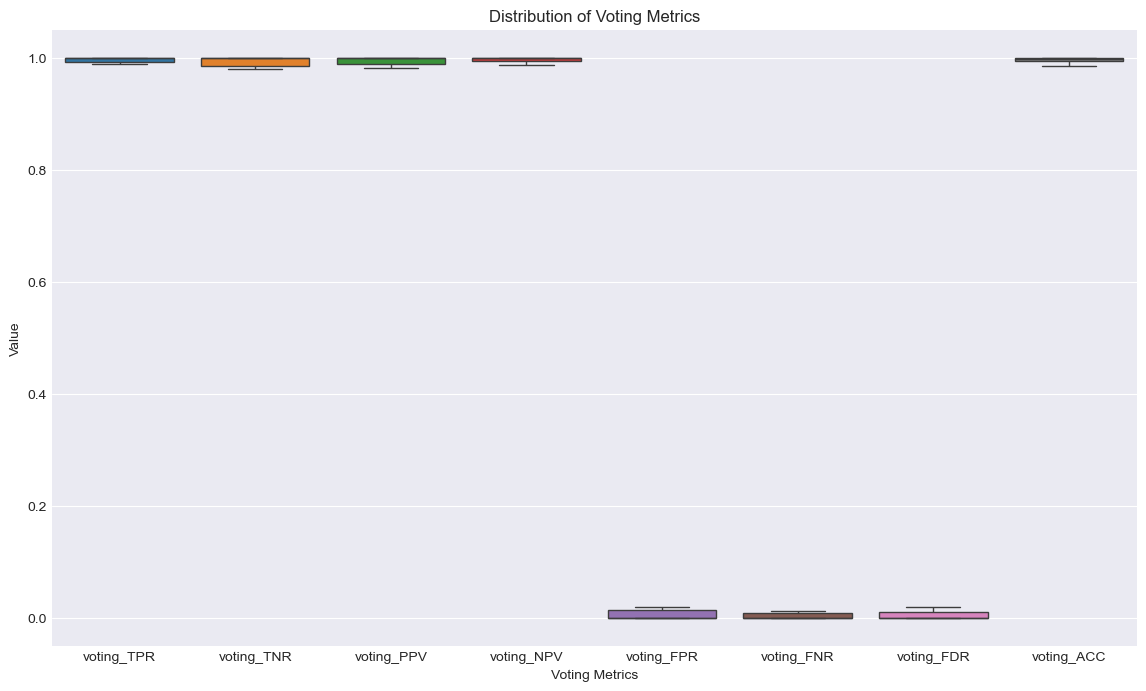

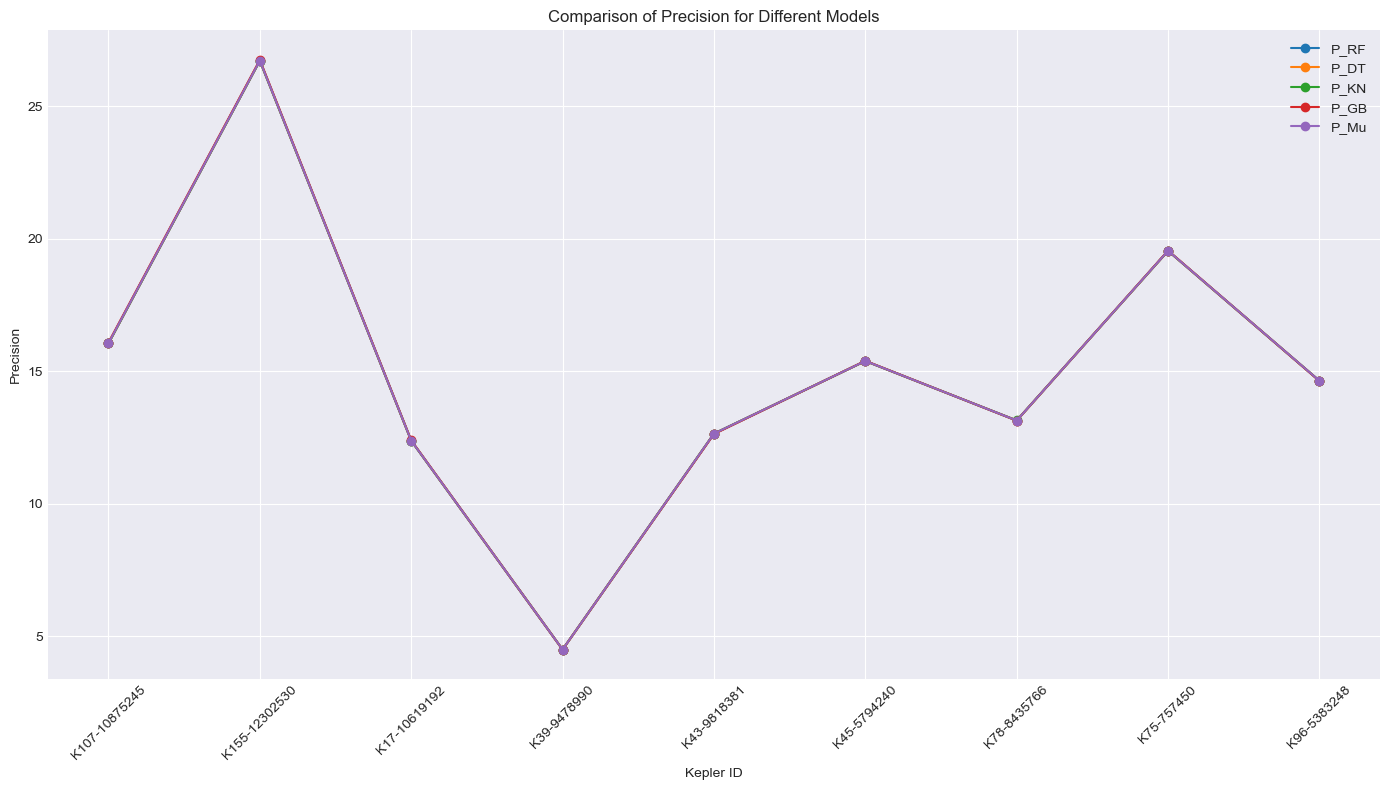

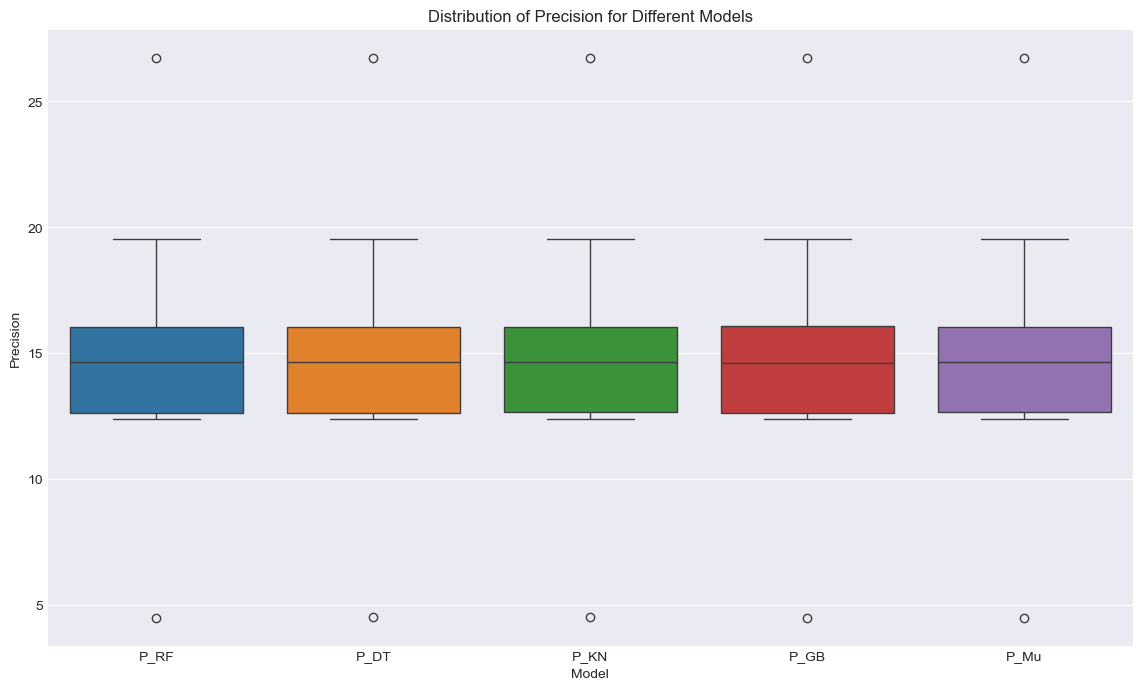

/var/folders/93/plwdv8nj71db7c3zcpqzm9n40000gn/T/ipykernel_95974/2438040037.py:90: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = heatmap_df.pivot('Kepler ID', 'Metric', 'Value')


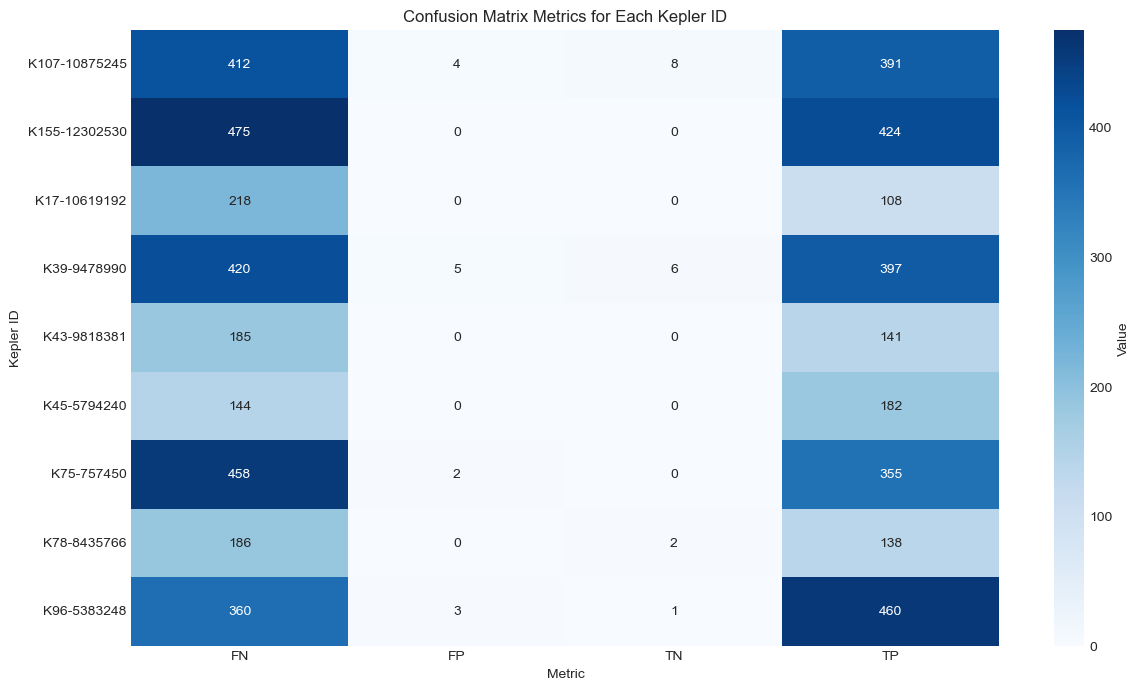

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# بارگذاری داده‌ها از فایل CSV
data = pd.read_csv('/Users/raouf/Dropbox/Final present/Mojtaba/master/out_data/RMSE_2024-05-19_Vic.csv')

# ترکیب ستون‌های 'Pl' و 'ID' برای ایجاد شناسه Kepler
data['Kepler ID'] = data['Pl'].astype(str) + '-' + data['ID'].astype(str)

# نمایش نام ستون‌ها برای بررسی
print(data.columns)

# تنظیمات عمومی برای نمودارها
plt.style.use('seaborn-darkgrid')

# نمودار خطی برای مقایسه RMSE مدل‌های مختلف
plt.figure(figsize=(14, 8))
models = ['rmse_DT', 'rmse_RF', 'rmse_KN', 'rmse_GB', 'rmse_XGB', 'rmse_Mu']
for model in models:
    plt.plot(data['Kepler ID'], data[model], marker='o', label=model)
plt.xlabel('Kepler ID')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# نمودار جعبه‌ای برای بررسی توزیع RMSE مدل‌های مختلف
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[models])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Distribution of RMSE for Different Models')
plt.show()

# نمودار خطی برای مقایسه متریک‌های مختلف Voting
plt.figure(figsize=(14, 8))
voting_metrics = ['voting_TPR', 'voting_TNR', 'voting_PPV', 'voting_NPV', 'voting_FPR', 'voting_FNR', 'voting_FDR', 'voting_ACC']
for metric in voting_metrics:
    plt.plot(data['Kepler ID'], data[metric], marker='o', label=metric)
plt.xlabel('Kepler ID')
plt.ylabel('Value')
plt.title('Comparison of Voting Metrics for Different Kepler IDs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# نمودار جعبه‌ای برای بررسی توزیع متریک‌های مختلف Voting
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[voting_metrics])
plt.xlabel('Voting Metrics')
plt.ylabel('Value')
plt.title('Distribution of Voting Metrics')
plt.show()

# نمودار خطی برای مقایسه دقت مدل‌های مختلف
plt.figure(figsize=(14, 8))
accuracy_metrics = ['P_RF', 'P_DT', 'P_KN', 'P_GB', 'P_Mu']
for metric in accuracy_metrics:
    plt.plot(data['Kepler ID'], data[metric], marker='o', label=metric)
plt.xlabel('Kepler ID')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# نمودار جعبه‌ای برای بررسی توزیع دقت مدل‌های مختلف
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[accuracy_metrics])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Distribution of Precision for Different Models')
plt.show()

# نمودار هیتمپ برای نمایش کانفیوژن متریکس‌های مختلف به صورت مقایسه‌ای
heatmap_data = []
for index, row in data.iterrows():
    heatmap_data.append([row['Kepler ID'], 'TP', row['TP']])
    heatmap_data.append([row['Kepler ID'], 'TN', row['TN']])
    heatmap_data.append([row['Kepler ID'], 'FP', row['FP']])
    heatmap_data.append([row['Kepler ID'], 'FN', row['FN']])

heatmap_df = pd.DataFrame(heatmap_data, columns=['Kepler ID', 'Metric', 'Value'])
plt.figure(figsize=(14, 8))
pivot_df = heatmap_df.pivot('Kepler ID', 'Metric', 'Value')
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Value'})
plt.title('Confusion Matrix Metrics for Each Kepler ID')
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Pl = np.array([6071903, 9139084, 10616571, 10878263, 11074541, 11100383, 8866102, 4827723, 11554435, 7051180, 9702072, 10187017, 7825899, 1161345, 8505215, 2302548, 2444412])
ID = np.array([6071903, 9139084, 10616571, 10878263, 11074541, 11100383, 8866102, 4827723, 11554435, 7051180, 9702072, 10187017, 7825899, 1161345, 8505215, 2302548, 2444412])
PerExoRGB = np.array([17.84, 7.97, 12.93, 19.21, 34.8, 14.99, 21.71, 17.43, 5.39, 2.22, 28.25, 26.74, 12.29, 8.6, 28.79, 12.29, 10.71])
PerRef = np.array([24.25, 13.33, 8.84, 21.77, 14.43, 12.35, 5.03, 25.06, 12.44, 35.27, 27.04, 18.86, 14.88, 10.07, 21.34, 14.86, 20.87])
P_Mu = np.array([15.776668010157783, 7.523182053374524, 12.939648413985688, 19.1517775916834, 34.48149576625364, 14.952755578001689, 22.374807371783202, 17.208035845436505, 5.47660255008685, 2.2254557007870766, 27.816293899720115, 26.257503403345154, 11.973289534158857, 8.452979203661286, 29.352114788587155, 12.012163940534284, 10.934201563410454])
Per_uperrExoRGP = np.array([6.8, 2.03, 1.91, 5.5, 3.47, 3.58, 0.94, 7.32, 1.66, 10.6, 8.26, 6.46


SyntaxError: incomplete input (2336670133.py, line 10)